In [2]:
# Keilands version
import sys
#sys.path.append('/Users/linggeli/neuroscience/neuro_replay')
#sys.path.append('D:\Documents\Analysis\LogisticRegression\neuro_replay-master')
sys.path.append('D:\Documents\Analysis\LogisticRegression\neuro_replay-master')

In [3]:
from scipy.io import loadmat

In [4]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
plt.style.use('seaborn-white')

## Data extraction
Data are extracted from Matlab files *from -2s to 2s relative to odor release* using functions in https://github.com/gaelias/statMatrixNeuralAnalysis

In [6]:
#data_odor = loadmat('/Users/linggeli/neuroscience/data/Mitt/mitt_extraction_odor2s.mat')

data_odor = loadmat('D:\Documents\Data\processedHPC\Mitt\mitt_extraction_odor2s.mat')
rat_name = 'Mitt'

In [7]:
print(data_odor.keys())  # data are stored as arrays in a dictionary with these names

dict_keys(['__header__', '__version__', '__globals__', 'eventTimeBins', 'lfpEpoch', 'lfpIDs', 'trialInfo', 'trialTimeBins', 'unitEpoch', 'unitIDs'])


In [8]:
print(data_odor['trialInfo'].shape)  # there are 292 trials
# for each trial we know the whether it is in-sequence or correct and its odor
#np.save('trial_info.npy', data_odor['trialInfo'])

(292, 4)


In [9]:
print(data_odor['unitEpoch'].shape)  
# there are 104 cell/neuron units and the spike train data are recorded at 4001 time points

(292, 4001, 104)


In [10]:
# some stats for the session:
_,_,num_cells = data_odor['unitEpoch'].shape
_,_,num_channels = data_odor['lfpEpoch'].shape
print('Cell Count: %s; Channel Count: %s'%(num_cells, num_channels))

Cell Count: 104; Channel Count: 21


In [11]:
print(data_odor['lfpEpoch'].shape)  
# similarly there are 21 LFP channels/tetrodes with data recorded at 4001 time points

(292, 4001, 21)


In [12]:
print(data_odor['eventTimeBins'])  # the time points are sampled every 1ms from -2s to 2s where 0s is odor release

[[-2.   ]
 [-1.999]
 [-1.998]
 ...
 [ 1.998]
 [ 1.999]
 [ 2.   ]]


In [13]:
print(data_odor['lfpIDs'])  # tetrode ids

[[array(['T12_LFP_Raw'], dtype='<U11')
  array(['T13_LFP_Raw'], dtype='<U11')
  array(['T14_LFP_Raw'], dtype='<U11')
  array(['T15_LFP_Raw'], dtype='<U11')
  array(['T16_LFP_Raw'], dtype='<U11')
  array(['T17_LFP_Raw'], dtype='<U11')
  array(['T18_LFP_Raw'], dtype='<U11')
  array(['T19_LFP_Raw'], dtype='<U11')
  array(['T1_LFP_Raw'], dtype='<U10')
  array(['T20_LFP_Raw'], dtype='<U11')
  array(['T21_LFP_Raw'], dtype='<U11')
  array(['T22_LFP_Raw'], dtype='<U11')
  array(['T23_LFP_Raw'], dtype='<U11')
  array(['T2_LFP_Raw'], dtype='<U10') array(['T3_LFP_Raw'], dtype='<U10')
  array(['T4_LFP_Raw'], dtype='<U10') array(['T5_LFP_Raw'], dtype='<U10')
  array(['T6_LFP_Raw'], dtype='<U10') array(['T7_LFP_Raw'], dtype='<U10')
  array(['T8_LFP_Raw'], dtype='<U10') array(['T9_LFP_Raw'], dtype='<U10')]]


In [27]:
print(data_odor['lfpIDs'])  # tetrode ids

[[array(['T12_LFP_Raw'], dtype='<U11')
  array(['T13_LFP_Raw'], dtype='<U11')
  array(['T14_LFP_Raw'], dtype='<U11')
  array(['T15_LFP_Raw'], dtype='<U11')
  array(['T16_LFP_Raw'], dtype='<U11')
  array(['T17_LFP_Raw'], dtype='<U11')
  array(['T18_LFP_Raw'], dtype='<U11')
  array(['T19_LFP_Raw'], dtype='<U11')
  array(['T1_LFP_Raw'], dtype='<U10')
  array(['T20_LFP_Raw'], dtype='<U11')
  array(['T21_LFP_Raw'], dtype='<U11')
  array(['T22_LFP_Raw'], dtype='<U11')
  array(['T23_LFP_Raw'], dtype='<U11')
  array(['T2_LFP_Raw'], dtype='<U10') array(['T3_LFP_Raw'], dtype='<U10')
  array(['T4_LFP_Raw'], dtype='<U10') array(['T5_LFP_Raw'], dtype='<U10')
  array(['T6_LFP_Raw'], dtype='<U10') array(['T7_LFP_Raw'], dtype='<U10')
  array(['T8_LFP_Raw'], dtype='<U10') array(['T9_LFP_Raw'], dtype='<U10')]]


In [70]:
print(data_odor['unitIDs'])  # mapping between tetrodes and units
#some tetrodes have no units while others have multiple

[[array([u'T12-U1'], dtype='<U6') array([u'T12-U2'], dtype='<U6')
  array([u'T12-U3'], dtype='<U6') array([u'T12-U4'], dtype='<U6')
  array([u'T12-U5'], dtype='<U6') array([u'T12-U6'], dtype='<U6')
  array([u'T12-U7'], dtype='<U6') array([u'T12-U8'], dtype='<U6')
  array([u'T12-U9'], dtype='<U6') array([u'T12-U10'], dtype='<U7')
  array([u'T12-U11'], dtype='<U7') array([u'T12-U12'], dtype='<U7')
  array([u'T12-U13'], dtype='<U7') array([u'T12-U14'], dtype='<U7')
  array([u'T12-U15'], dtype='<U7') array([u'T12-U16'], dtype='<U7')
  array([u'T13-U1'], dtype='<U6') array([u'T13-U2'], dtype='<U6')
  array([u'T13-U3'], dtype='<U6') array([u'T13-U4'], dtype='<U6')
  array([u'T13-U5'], dtype='<U6') array([u'T13-U6'], dtype='<U6')
  array([u'T13-U7'], dtype='<U6') array([u'T13-U8'], dtype='<U6')
  array([u'T13-U9'], dtype='<U6') array([u'T13-U10'], dtype='<U7')
  array([u'T13-U11'], dtype='<U7') array([u'T13-U12'], dtype='<U7')
  array([u'T13-U13'], dtype='<U7') array([u'T13-U14'], dtype='<U7'

In [13]:
spike_data = data_odor['unitEpoch'][:, 1:, :]  
# remove the first time point at -2s so that the time series length becomes 4000 for convenience
spike_data_temp = np.swapaxes(spike_data, 1, 2)
# reduce the temporal resolution to 10ms by averaging every 10 time points
spike_data_binned = np.mean(spike_data_temp.reshape((data_odor['unitEpoch'].shape[0], data_odor['unitEpoch'].shape[2], 400, 10)), axis=3)
print(spike_data_binned.shape)
#np.save('spike_data_binned.npy', spike_data_binned)

(292, 104, 400)


In [14]:
from matplotlib import rcParams
plt.style.use('seaborn-white')
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Georgia'

## Spike train and LFP data 
The spike train data are sparse even after 10ms binning; many units do not have spikes and those that have spikes do so not very frequently. The LFP data on the other hand are very noisy.

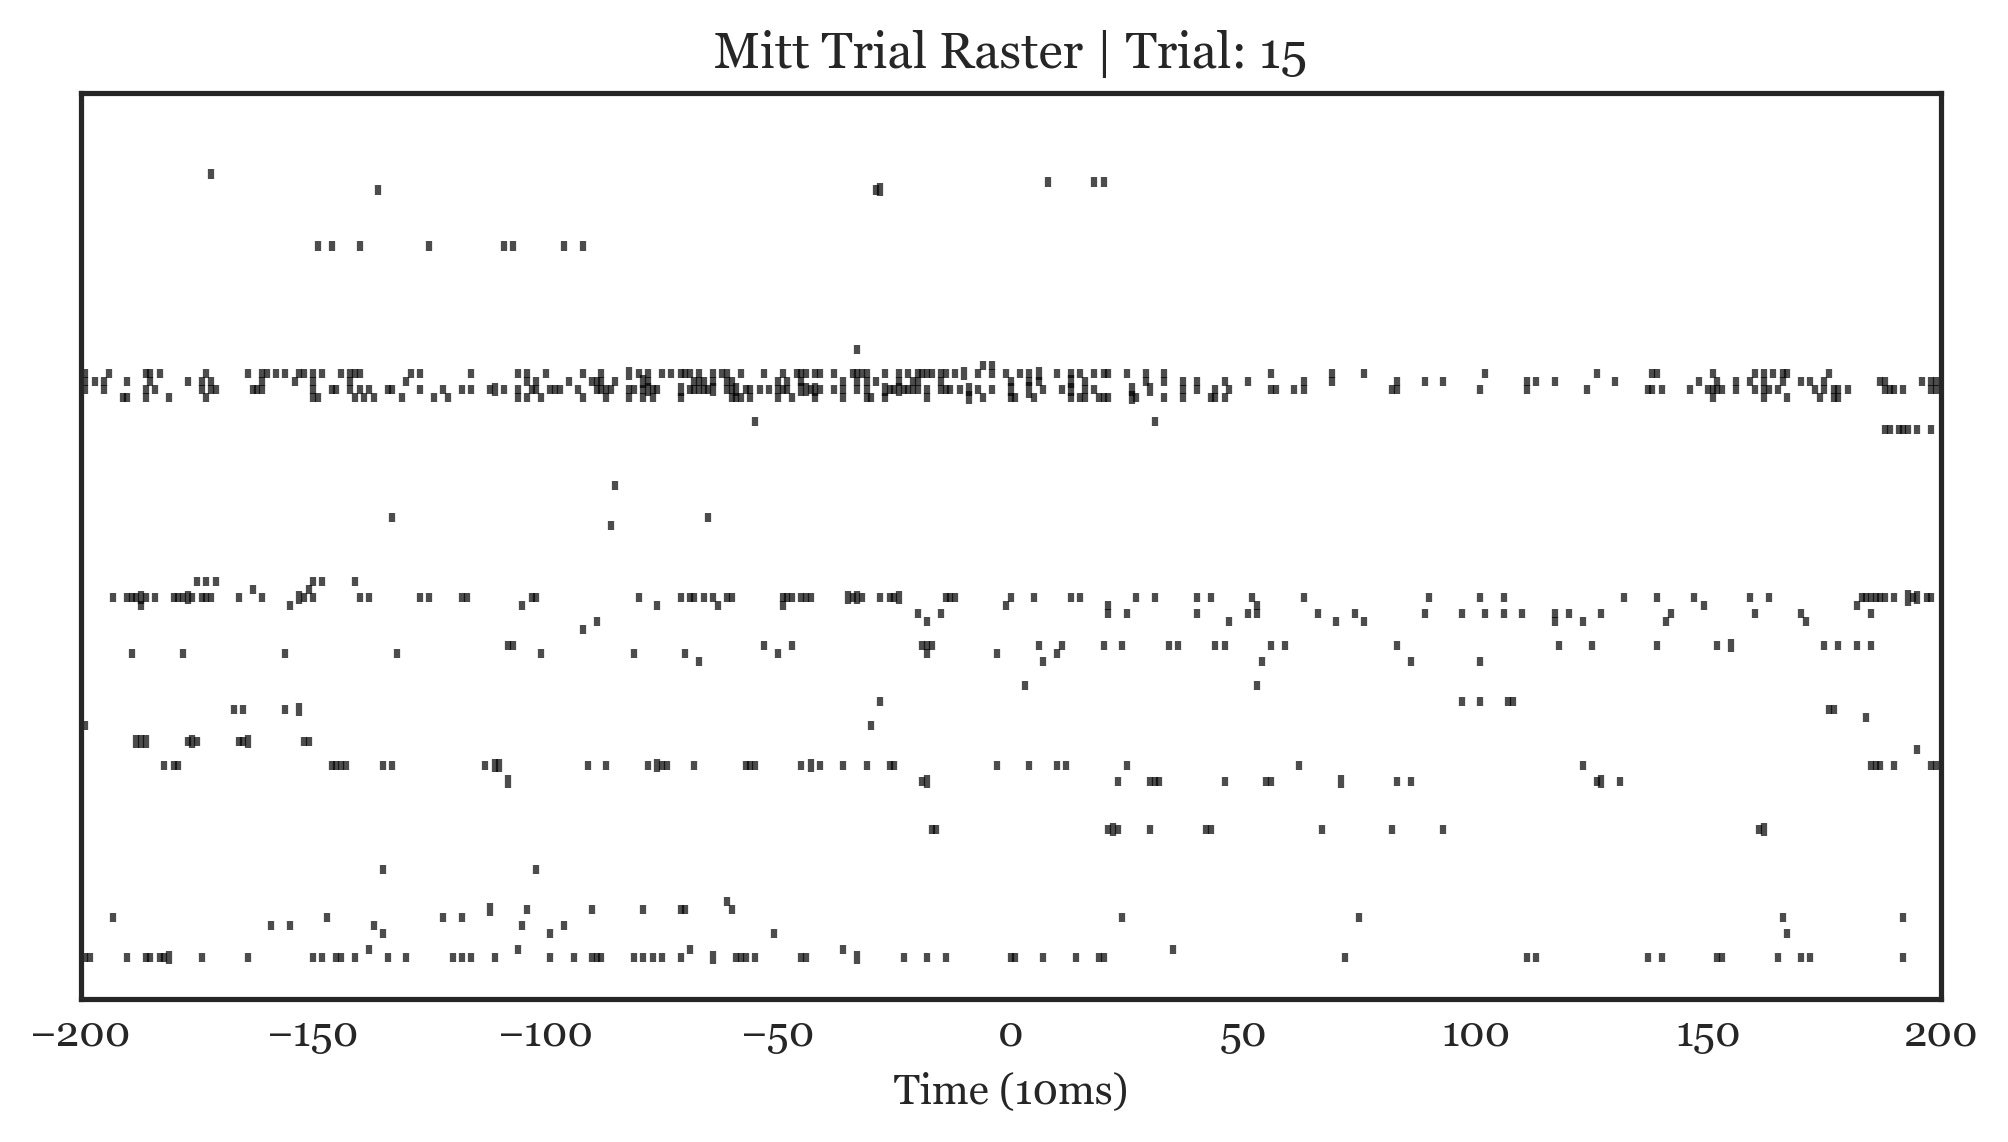

In [42]:
trial_index = 15
fig = plt.figure(figsize=(8, 4), dpi=300)
for i in range(spike_data_binned.shape[1]):
    plt.scatter(np.arange(400) - 200, np.ones(400) * i, s=spike_data_binned[trial_index, i, :] * 50, color='black', marker="|",alpha=0.7)
plt.xlim(-200, 200)
#plt.ylim(0.5, 46.5)
plt.xlabel('Time (10ms)')
plt.yticks([], [])
plt.title('%s Raster | Trial: %s'%(rat_name, trial_index))
plt.savefig('figs\Mitt_Raster_TI-'+str(trial_index)+'.png')
plt.show()

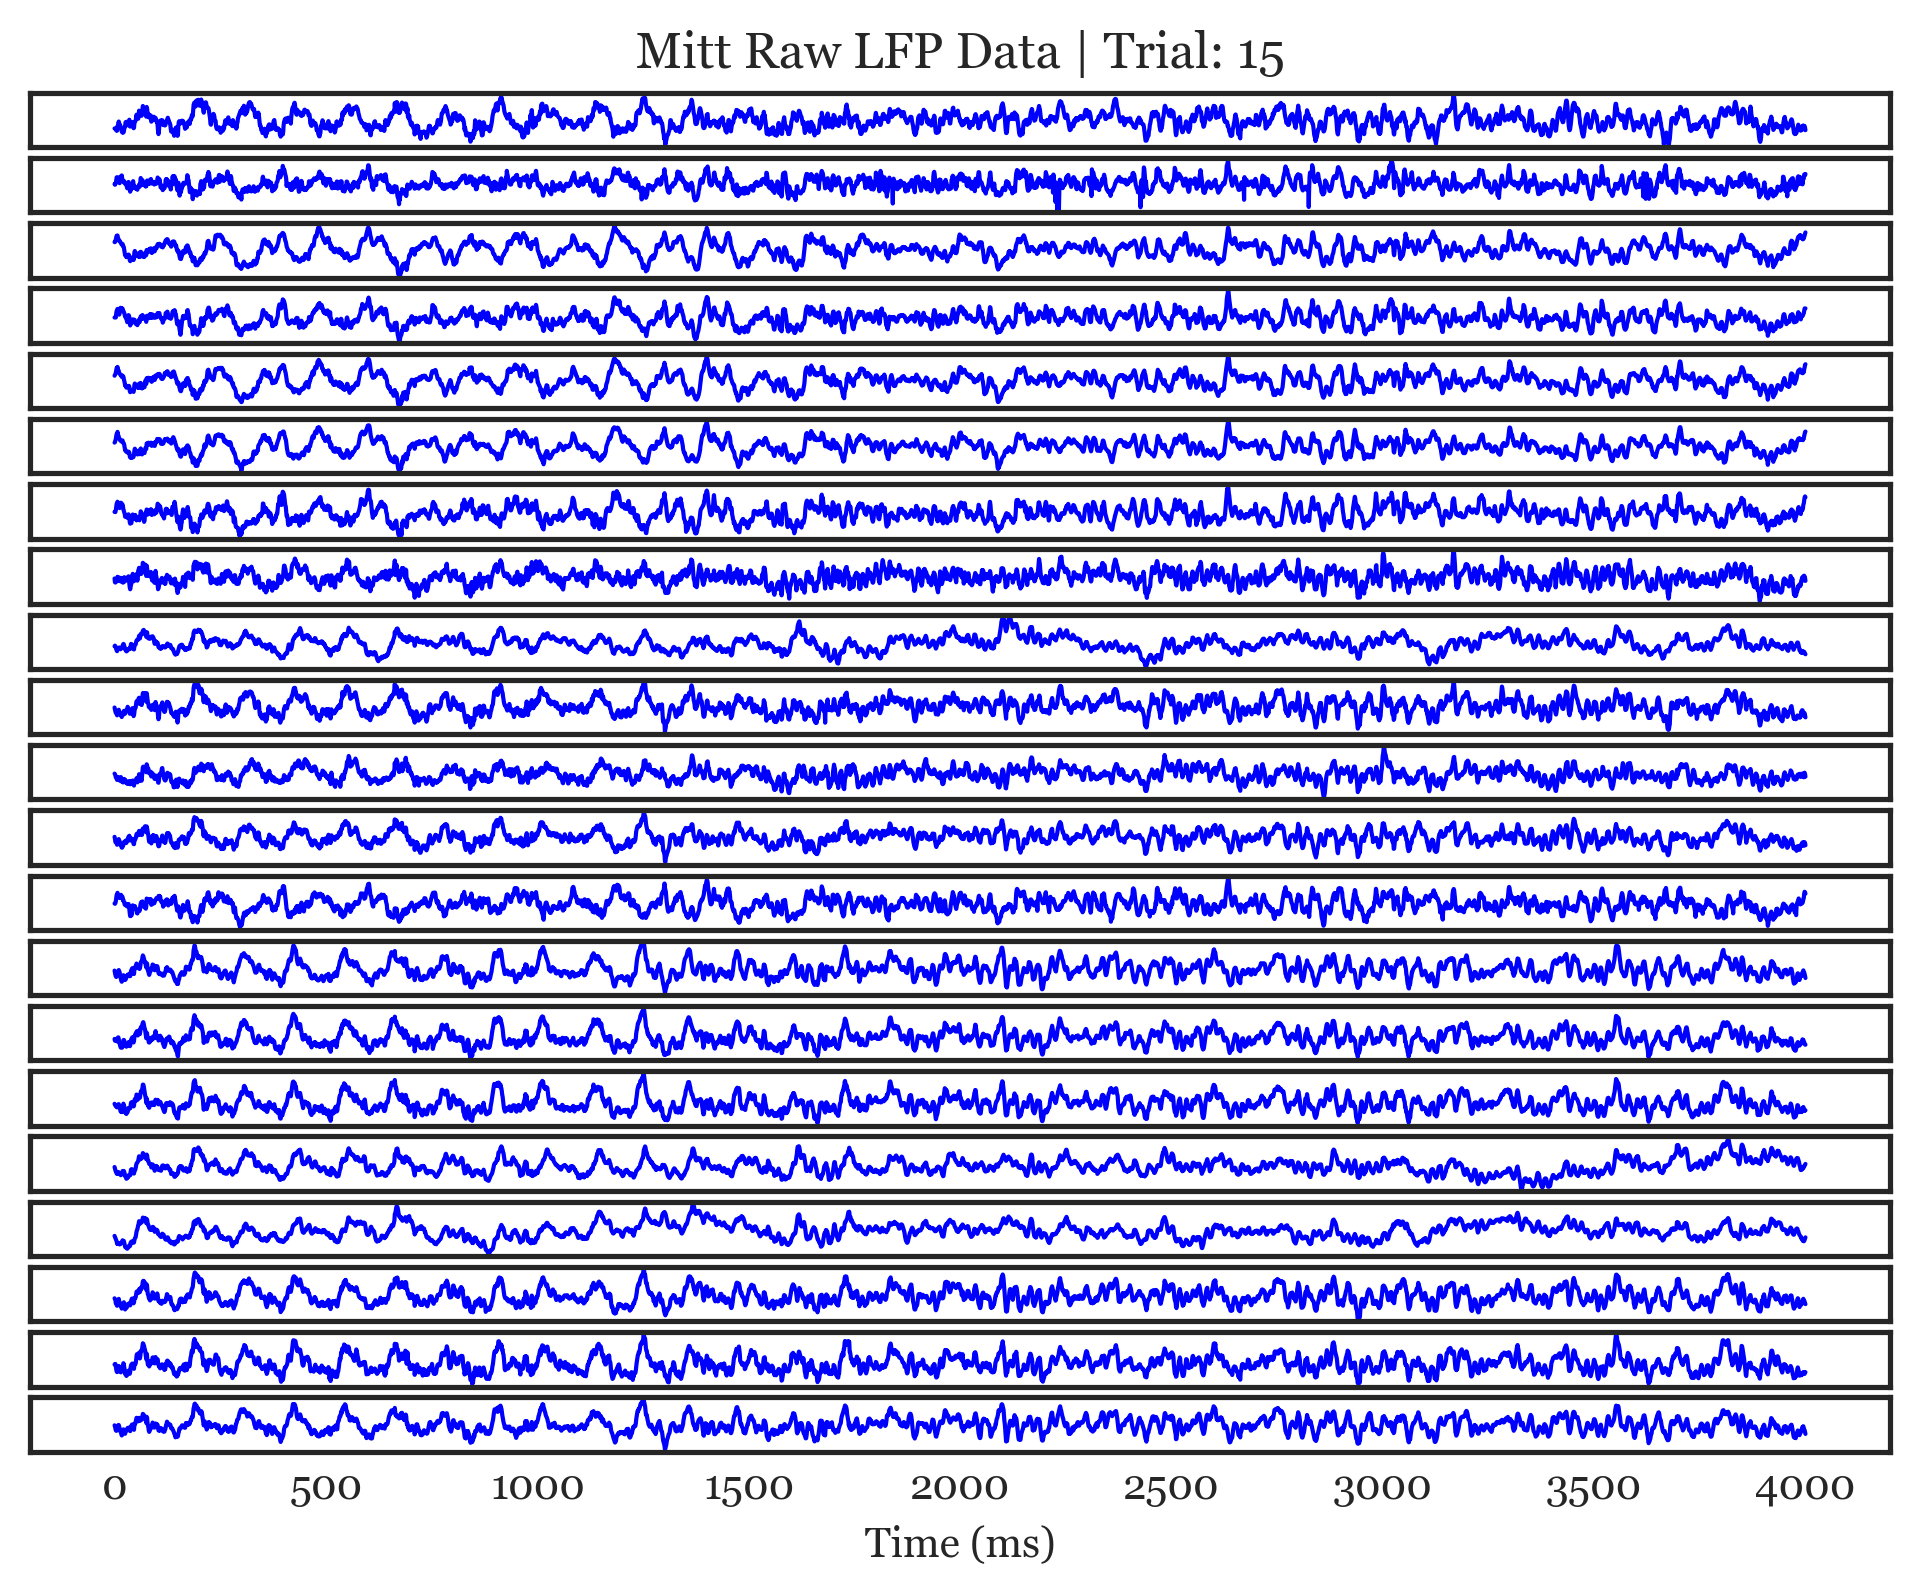

In [44]:
trial_index = 15
fig = plt.figure(figsize=(8, 6), dpi=300)
for l in range(data_odor['lfpEpoch'].shape[2]):
    plt.subplot(data_odor['lfpEpoch'].shape[2], 1, l + 1)
    plt.plot(data_odor['lfpEpoch'][trial_index][:, l], linewidth=1, c='blue')
    plt.yticks([], [])
    if l < data_odor['lfpEpoch'].shape[2] - 1:
        plt.xticks([], [])
    if l == 0:
        plt.title('%s Raw LFP Data | Trial: %s'%(rat_name, trial_index))
plt.xlabel('Time (ms)')
plt.show()

In [75]:
#np.save('lfp_data_sampled.npy', data_odor['lfpEpoch'][:, 1::10, :])

In [76]:
# get the actual clock time as opposed to time relative to odor release
n = data_odor['trialInfo'].shape[0]
actual_time = np.zeros((n, 400))
for i in range(n):
    actual_time[i, :] = data_odor['trialTimeBins'][0, :][i][1::10, 0]
#np.save('actual_time.npy', actual_time)